In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# INTRODUCTION

---


Technology and its integration into education has become a part of ourlife now.But it was'nt the case until recently.The inception of Ed Tech industry in India can be traced back to 20 Years which started with the concept of class rooms with recorded classes.Though it did not find much traction due to skepticism for innovation,which happens to be the common road block for innovative ideas.It took more than half a decace to gain traction and evolve as smart class rooms by 2010.And it another five years for the concept to evolve and reach into the hands of the students as mobile apps.

This is a comprehensive study of how Ed Tech industry transformed over the years. This is an attempt to generalize the growth of this medium and factors responsible for its growth using different sources available online and government websites.


#LOAD DATA AND NECESSARY LIBRARIES

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm

from matplotlib import pyplot as plt
import plotly.express as px

from IPython.display import display, display_html

**DATA EXPLORATION**

> LOADING DATA



LOADING DATA

In [300]:
population_2010=pd.read_csv('/content/drive/MyDrive/ED_TECH/India-2010.csv')
population_2020=pd.read_csv('/content/drive/MyDrive/ED_TECH/India-2020.csv')
deals_till_2015=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/ED_TECH_DEALS2011-2015.csv')
marketshare_till_2016=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/GLOBAL_SHARE_OF_FUNDS_RAISED_DEALS(2011-2016).csv')
sub_sector_funding=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/SUB_SECTORS.csv')
investments_2015_19=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/INVESTMENTS_AND_DEALS(2015-2019).csv')
funding_rounds=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/FUNDING_ROUNDS.csv')
funding_2016_21=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/FUNDING(2016-2021).csv')
funding_2020=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/H1_funding 2020.csv')
ed_tech_deals_2020=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/ed_tech_deals_2020.csv')
hyper_growth=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/HYPER_GROWTH2020-2022.csv')
k_12=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/K-12 MARKET_GROWTH_SINCE_PANDAMIC_2019-2022.csv')
post_k12=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/POST_K-12 MARKET_SHARE_AND_GROWTH.csv')
investment2016_21=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/investment_deals(2016-2021).csv')
funding_2022=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/FUNDING_SHARE_2022.csv')
active_users=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/ACTIVE_USERS_2023.csv')
sectorwise_projection=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/SECTOR_WISE_PROJECTION.csv')
urb_users=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/URBAN_RURAL_CONNECTIVITY.csv')
data_cost=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/Data_cost.csv')
internet_boom=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/INTERNET_PENETRATION.csv')
mobile_users=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/Mobile_internet_users.csv')
user_demography=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/Internet_user_demography.csv')
tablet_users=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/tablet_sales.csv')
fdi_gov=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/FDI_RBI.csv')
market_projection=pd.read_csv('/content/drive/MyDrive/ED_TECH_CSV/market_projection_category.csv')

In [301]:
population_2010['total']=population_2010['M']+population_2010['F']
projection=population_2010.iloc[:,[0,3]]
projection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     21 non-null     object
 1   total   21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [302]:
y=projection['Age']
x1=projection['total']

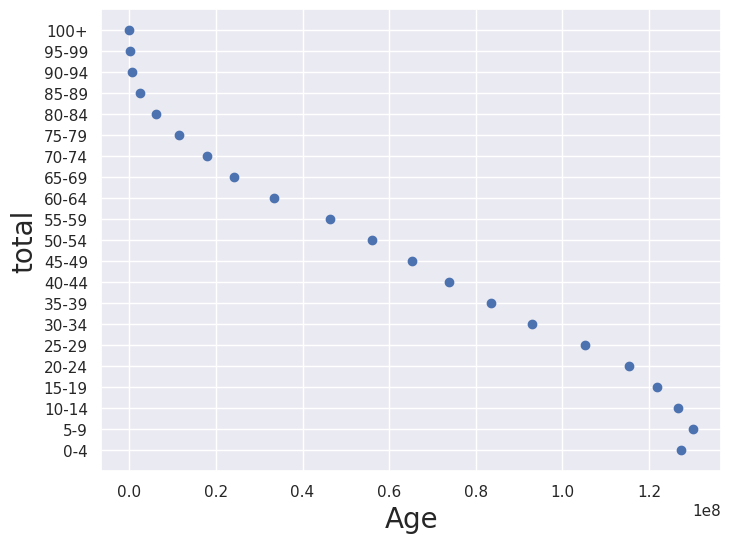

In [303]:
plt.scatter(x1,y)

plt.xlabel('Age', fontsize = 20)

plt.ylabel('total',fontsize = 20)

plt.show()

# **DATA EXPLORATION**


##CREATING DATA FRAMES

In [304]:
# For the convenience of further work, we will create a list of dataframes
data = [population_2010,population_2020,deals_till_2015,marketshare_till_2016,sub_sector_funding,investments_2015_19,funding_rounds,funding_2016_21,funding_2020,ed_tech_deals_2020,hyper_growth,k_12,
        post_k12,investment2016_21,funding_2022,active_users,sectorwise_projection,
        urb_users,data_cost,internet_boom,mobile_users,user_demography,tablet_users,fdi_gov,market_projection]

# Create a list of dateframes with time series
#df_dates = [covid_daily, vaccination]

# Create a list of table names
titles = ['Indian Demography 2010','Indian Demography 2020','ed tech deals till 2015','Ed tech market share till 2016','Sub sector funding of ed techs','investments 2015-19',
          'funding rounds','funding 2016-21','funding 2020','ed_tech_deals_2020','hyper growth','k-12','post-12','investments_2016-21','funding 2022','active ed tech users','sector wise projections',
          'urban internet users','data cost','internet boom','mobile users','user demography','tablet users','fdi_rbi','market projections']


##DISPLAYING DATAFRAMES

In [305]:
# @title
data_for_display = []

# At each iteration, we set the format to the dataframe
for i, df in enumerate(data):
    if i == 23:
        style_df = df.head().style\
                            .set_caption(titles[i])\
                            .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#95c5b1')]}])\
                            .set_properties(**{'white-space': 'nowrap'})\
                            .set_precision(2)
    else:
        style_df = df.head().style\
                            .set_caption(titles[i])\
                            .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b98')]}])\
                            .set_properties(**{'white-space': 'nowrap'})\
                            .set_precision(2)

    data_for_display.append(style_df)

# Displaying dataframes
display(data_for_display[0], data_for_display[1], data_for_display[2],data_for_display[3],data_for_display[4],data_for_display[5],data_for_display[6],data_for_display[7],
        data_for_display[8],data_for_display[9],data_for_display[10],data_for_display[11],data_for_display[12],data_for_display[13],data_for_display[14],data_for_display[15],
        data_for_display[16],
        data_for_display[17],data_for_display[18],
        data_for_display[19],data_for_display[20],data_for_display[21],data_for_display[22],data_for_display[23])

<ipython-input-305-623669e61d78>:17: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-305-623669e61d78>:11: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Age,M,F,total
0,0-4,66762871,60708485,127471356
1,5-9,68255358,61864150,130119508
2,10-14,66546666,60188347,126735013
3,15-19,63573345,58150509,121723854
4,20-24,59980845,55287869,115268714


,Age,M,F
0,0-4,60771734,55952175
1,5-9,63921193,58262875
2,10-14,65906416,59814870
3,15-19,67689391,61362594
4,20-24,65745248,59457333


,Country,2011,2012,2013,2014,2015
0,China,6,10,28,33,54
1,India,13,20,16,29,35
2,Uk,11,12,12,19,29


,Unnamed: 0,% OF DEALS,%OF SHARE IN MONEY RAISED
0,US,67,68
1,INDIA,6,3
2,CHINA,5,20
3,UK,3,3
4,CANADA,2,1


,Sub Sectors,Start Ups Funded(2014-2019)
0,Skill Development,45
1,Test Preperation,41
2,Enterprise Solution,25
3,Online Discovery,23
4,Certification,19


,YEAR,NO. OF DEALS,INVESTMENT (US Million)
0,2015,26,81
1,2016,33,194
2,2017,30,176
3,2018,42,664
4,2019,42,404


,YEAR,ROUNDS,FUNDING(In Million)
0,2016,145,245
1,2017,118,191
2,2018,132,742
3,2019,146,553
4,2020,163,2300


,YEAR,FUNDING (In Million)
0,2016,245
1,2017,191
2,2018,742
3,2019,553
4,2020,2300


,Top Edtech Funding Rounds Recorded in H1 2020 in India,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Startup,Funding amount (US$ million),Investor,EdTech sub-segment
1,Byju’s,US$200 million,"Tiger Global, General Atlantic, Bond Capital",Test preparation
2,Unacademy,US$110 million,"Facebook, Sequoia India, Blume Ventures",Test preparation
3,Vedantu,US$43.3 million,"GGV Capital, Legend Capital, Omidyar Network",Test preparation
4,Doubtnut,US$15 million,"Tencent, Omidyar Network, Sequoia India",Test preparation


,Category,% of Total Deals
0,Test Preparation,25
1,K12,17
2,Skill Development,14
3,Enterprise Solutions,11
4,Online Discovery,11


,Name of the Unicorn,FY20 (IN Cr),FY21,FY22,Revenue Growth over in FY21 (%),Revenue Growth over in FY20 (%)
0,Vedantu,24.6,93.70,168.90,80.26,586.59
1,Unacademy,64.7,397.70,719.30,80.86,1011.75
2,PhysicsWallah,-,24.60,234.70,854.07,-
3,Eruditus,578.5,988.80,1848.40,86.93,219.52
4,UpGrad,162.3,327.70,679.20,107.26,318.48


,Grade,2019,% share,2022,% share.1,% growth
0,1-5,15900000,6.00,204000000,12.00,1183.02
1,6-8,84800000,32.00,544000000,34.00,541.51
2,9-12,164300000,62.00,1054000000,64.00,541.51
3,Total,265000000,nan,1700000000,nan,nan
4,Users,25000000,nan,110500000,nan,442.00


,Category,2019,% share,2022,% share.1,% growth
0,Higher Ed,333700000,71.00,1059000000,60.00,217.35
1,Technical skilling,56400000,12.00,335350000,19.00,494.59
2,Test Prep (professional),56400000,12.00,123550000,7.00,119.06
3,Test Prep (Govt),23500000,5.00,247100000,14.00,951.49
4,Total,470000000,nan,1765000000,nan,275.53


,YEAR,INVESTMENTS (In Million $)
0,2016,177
1,2017,175
2,2018,646
3,2019,404
4,2020,2105


,COMPANY,FUNDING (million)
0,Byju's,810.00
1,Eruditus,349.98
2,UpGrad,202.62
3,LEAD,110.52
4,PhysicsWallah,92.10


,Name,Users (In Millions)
0,BYJU'S,150
1,Vedantu,35
2,Unacademy,13
3,UpGrad,2


,SEGEMENT(US$),2020(Millions),2025(Millions)
0,K-12,1160,4300
1,Test Preperation,800,3990
2,Online Certification,580,1380
3,Skill Development,260,730
4,Total,2800,10400


,YEAR,URBAN USERS (Millions),% SHARE,% GROWTH,RURAL USERS (Million),% SHARE.1,% GROWTH.1
0,2017,250,55,15,134,15,30
1,2018,28,61,12,182,20,13
2,2019,309,66,10,264,28,45
3,2020,323,67,4,299,31,13
4,2021,341,69,5,351,37,18


,Year,1GB_Data Cost(in Rupee)
0,2014,269.00
1,2015,226.00
2,2016,75.57
3,2017,19.35
4,2018,11.78


,YEAR,INTERNET PENETRATION (%)
0,2007,4.00
1,2008,4.40
2,2009,5.10
3,2010,7.50
4,2011,10.10


,Year,Mobile Phone Internet users,New smart phones(in millions)
0,2015,242.92,nan
1,2016,281.81,nan
2,2017,351.60,134.00
3,2018,390.90,147.00
4,2019,420.70,158.00


,Age Group,AIl India(%),Urban(%),Rural(%)
0,12-15,14,8,15
1,16-19,18,11,21
2,20-29,35,21,37
3,30-39,19,33,17
4,40-49,9,14,7


,Year,Tablets sold (million)
0,2010,17.40
1,2011,71.40
2,2012,143.40
3,2013,219.90
4,2014,230.10


,SECTOR(Billion USD),2013,2014,2015,2016,2017,2018,2019,2020,2021,2022(US$ billion)
0,Manufacturing,"6,380","9,613","8,439","11,972","7,066",9.60,9.60,9.30,16.30,11.30
1,financial services,"1,026","3,075","3,547","3,732","4,070",7.20,5.70,3.50,4.70,6.80
2,computer services,934,"2,154","4,319","1,937","3,173",3.70,5.10,23.80,9.00,5.60
3,retail and wholesale,"1,000","2,551","3,998","2,771","4,478",4.90,5.10,3.90,5.10,5.30
4,Business services,521,680,"3,031","2,684","3,005",2.80,3.80,1.80,2.50,2.00




> TO SEE THE **NUMBER** **OF** **RECORDS** FEATURED IN EACH DATA FRAME




In [306]:
# @title
def count_records_and_columns(dfs: list,
                              indexs: list):
    '''

    The function accepts the following arguments:

    dfs - list of dataframes
    indexs - list of index names

    '''
    # Creating a list of dictionaries
    info_for_df = []

    # Create a row counter
    strings = 0
    # Creating a column counter
    columns = 0

    # At each iteration, we create a dictionary with the number of rows and columns of the current dataframe
    for df in dfs:
        info_for_df.append({'Strings': df.shape[0], 'Columns': df.shape[1]})

    # At each iteration, we count the total number of rows and columns for all dataframes
    for df in dfs:
        strings += df.shape[0]
        columns += df.shape[1]

    info_for_df.append({'Strings': strings, 'Columns': columns})

    # Create the final dataframe
    df = pd.DataFrame(info_for_df, index=indexs).T

    # Displaying the dataframe
    display(df.style\
              .set_caption('Number of records and attributes in dataframes')\
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}]))

In [307]:
count_records_and_columns([data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],
                           data[17],data[18],data[19], data[20],data[21], data[22]],
                          ['Indian Demography 2010','Indian Demography 2020','ed tech deals till 2015','Ed tech market share till 2016','Sub sector funding of ed techs','investments 2015-19',
          'funding rounds','funding 2016-21','funding 2020','hyper growth','k-12','post-12','investments_2016-21','funding 2022','active ed tech users','sector wise projections',
          'urban internet users','data cost','internet boom','mobile users','user demography','tablet users','fdi_rbi','market projections'])

,Indian Demography 2010,Indian Demography 2020,ed tech deals till 2015,Ed tech market share till 2016,Sub sector funding of ed techs,investments 2015-19,funding rounds,funding 2016-21,funding 2020,hyper growth,k-12,post-12,investments_2016-21,funding 2022,active ed tech users,sector wise projections,urban internet users,data cost,internet boom,mobile users,user demography,tablet users,fdi_rbi,market projections
Strings,21,21,3,6,7,5,7,6,11,7,6,5,5,6,10,4,5,5,8,16,9,6,11,190
Columns,4,3,6,3,2,3,3,2,4,2,6,6,6,2,2,2,3,7,2,2,3,4,2,79


TO SEE THE **DATA** **TYPES** OF THE DATA

In [308]:
# @title
def color_text(df):
    '''

    The function accepts the following arguments:

    df - dataframe

    '''
    # Checking the data type
    if df in ['int64','int32']: # If the numeric color is white
        color = 'White'
        return f'Color: {color}'

def cell_fill(df):
    '''

    The function accepts the following arguments:

    df - dataframe

    '''
    # Checking data types and filling cells with color
    if df == 'object':
        color = '#DCDCDC'
    elif df in ['float64','float32']:
        color = '#C0C0C0'
    elif df in ['int64','int32']:
        color = '#696969'
    else:
        color = '#A9A9A9'
    return f'background-color: {color}'

def data_type_visualization(dfs: list, titles: list):
    '''

    The function accepts the following arguments:

    dfs - list of dataframes
    titles - list of table names

    '''
    # We create an empty list. We will put formatted dataframes there
    data_styler = []

    output = ''

    # At each iteration, we create a formatted dataframe and put it in the list
    for i, name_df in enumerate(dfs):
        df_for_data = pd.DataFrame([dfs[i].dtypes], index=['Type']).T # Create a dataframe
        # Create a display block and a formatted dataframe
        df_styler = df_for_data.style\
                               .set_table_attributes("style='display:inline'")\
                               .set_caption(titles[i])\
                               .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}])\
                               .background_gradient(cmap='Greys')\
                               .set_precision(2)\
                               .applymap(cell_fill)\
                               .applymap(color_text)
        data_styler.append(df_styler)

# At each iteration, we combine the blocks with the dataframe and for display one by one
    for i, block in enumerate(data_styler):
        output += data_styler[i]._repr_html_() + '        '

    # Displaying information on the screen
    display_html(output, raw=True)


In [309]:
data_type_visualization([data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],
                           data[17],data[18],data[19], data[20],data[21], data[22],data[23]],
                          ['Indian Demography 2010','Indian Demography 2020','ed tech deals till 2015','Ed tech market share till 2016','Sub sector funding of ed techs','investments 2015-19',
          'funding rounds','funding 2016-21','funding 2020','hyper growth','k-12','post-12','investments_2016-21','funding 2022','active ed tech users','sector wise projections',
          'urban internet users','data cost','internet boom','mobile users','user demography','tablet users','fdi_rbi','market projections'])

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-308-3012b04bc6ab>:57: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-3

,Type
Age,object
M,int64
F,int64
,Type
Country,object
2011,int64
2012,int64
2013,int64
2014,int64
2015,int64


##**NULL VALUES**

In [310]:
# @title
def count_missing_values(dfs: list, titles: list):
    '''

    The function accepts the following arguments:

    dfs - list of dataframes
    titles - list of table names

    '''
    # We create an empty list. We will put formatted dataframes there
    data_styler = []

    output = ''

    # At each iteration, we create a formatted dataframe and put it in the list
    for i, name_df in enumerate(dfs):
        new_df = []
        # At each iteration, we go through the names of the columns of the dataframe
        for col in name_df.columns:
            # Calculating the percentage of missing values
            pct_missing = name_df[col].isnull().mean()
            # Create a dictionary
            dic = {'Column name': col, '%': pct_missing}
            # Add a dictionary to the list
            new_df.append(dic)

        # Create a display block and a formatted dataframe
        df_styler = pd.DataFrame(new_df).style\
                                        .set_table_attributes("style='display:inline'")\
                                        .set_caption(titles[i])\
                                        .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}])\
                                        .background_gradient(cmap='Reds')\
                                        .set_precision(2)
        data_styler.append(df_styler)

# At each iteration, we combine the blocks with the dataframe and for display one by one
    for i, block in enumerate(data_styler):
        output += data_styler[i]._repr_html_() + ' '

    # Displaying information on the screen
    display_html(output, raw=True)

In [311]:

count_missing_values([data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],
                           data[17],data[18],data[19], data[20],data[21], data[22],data[23]],
                          ['Indian Demography 2010','Indian Demography 2020','ed tech deals till 2015','Ed tech market share till 2016','Sub sector funding of ed techs','investments 2015-19',
          'funding rounds','funding 2016-21','funding 2020','hyper growth','k-12','post-12','investments_2016-21','funding 2022','active ed tech users','sector wise projections',
          'urban internet users','data cost','internet boom','mobile users','user demography','tablet users','fdi_rbi','market projections'])

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-310-959312556609>:34: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`

<ipython-input-3

,Column name,%
0,Age,0.00
1,M,0.00
2,F,0.00
,Column name,%
0,Country,0.00
1,2011,0.00
2,2012,0.00
3,2013,0.00
4,2014,0.00
5,2015,0.00


**DROPPING** NULL VALUES

In [312]:
k_12.dropna()

,Grade,2019,% share,2022,% share.1,% growth
0,1-5,15900000,6.0,204000000,12.0,1183.018868
1,6-8,84800000,32.0,544000000,34.0,541.509434
2,9-12,164300000,62.0,1054000000,64.0,541.509434


**FILL** NULL VALUES

In [313]:
min_mobile_sales=mobile_users['New smart phones(in millions)'].min()
mobile_users['New smart phones(in millions)'].fillna(value=min_mobile_sales, inplace=True)

In [316]:
mean_value=tablet_users['Tablets sold (million)'].mean()

In [317]:
tab_round=tablet_users.round(0).astype(int)
tab_round.loc[len(tab_round.index)] = ['2021',np.nan]
tab_round.loc[len(tab_round.index)] = ['2022',np.nan]

In [320]:
tab_round['Tablets sold (million)'].fillna(value=mean_value, inplace=True)

In [321]:
#convert int type
#fill null values
#visualize data
#combine Data frames

##CONVERTING DATA TYPES


**CONVERTING** DATA TYPES

In [322]:
hyper_growth['FY20 (IN Cr)']=hyper_growth['FY20 (IN Cr)'].str.replace('-','0').astype(float)

In [323]:
hyper_growth['Revenue Growth over in FY20  (%)']=hyper_growth['Revenue Growth over in FY20  (%)'].str.replace('-','0').astype(float)

In [324]:
hyper_growth['FY20 (IN Cr)'] = hyper_growth['FY20 (IN Cr)'].apply(np.int64)
hyper_growth['FY21'] = hyper_growth['FY21'].apply(np.int64)
hyper_growth['FY22'] = hyper_growth['FY22'].apply(np.int64)
hyper_growth['Revenue Growth over in FY20  (%)'] = hyper_growth['Revenue Growth over in FY20  (%)'].apply(np.int64)
hyper_growth['Revenue Growth over in FY21 (%)'] = hyper_growth['Revenue Growth over in FY21 (%)'].apply(np.int64)

**REMOVING** CHARACTERS

In [325]:
funding_2020.columns = funding_2020.iloc[0]
#funding_2020.rename(columns = {'Top Edtech Funding Rounds Recorded in H1 2020 in India':'Edtech Company'}, inplace = True)
funding_2020 = funding_2020[1:]
funding_2020['Funding amount (US$ million)'] = funding_2020['Funding amount (US$ million)'].str.replace('US','').str.replace('$','').str.replace(' million','').astype(float)


<ipython-input-325-a8e1a6b36faa>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-325-a8e1a6b36faa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
high_growth_2020=hyper_growth.drop(['Revenue Growth over in FY21 (%)'],axis=1)
growth_2020=high_growth_2020.drop([2])
growth_2020=growth_2020.iloc[:,1:5].round(0).astype(int)

growth_2020['FY20 (IN Cr)'] = growth_2020['FY20 (IN Cr)'].apply(np.int64)
growth_2020['FY21'] = growth_2020['FY21'].apply(np.int64)
growth_2020['FY22'] = growth_2020['FY22'].apply(np.int64)
growth_2020['Revenue Growth over in FY20  (%)'] = growth_2020['Revenue Growth over in FY20  (%)'].apply(np.int64)

In [327]:
da=pd.DataFrame( columns= ["Year","1GB_Data Cost(in Rupee)" ,"INTERNET PENETRATION (%)","Mobile Phone Internet users","New smart phones(in millions)","Tablets sold (million)","ROUNDS	FUNDING(In Million)","FDI_R&D_ED"])

#DATA **VISUALIZATION**

In [328]:
population_2010['total']=population_2010['M']+population_2010['F']
population_2020['total']=population_2020['M']+population_2020['F']
growth=pd.concat([population_2010,population_2020],ignore_index=True)

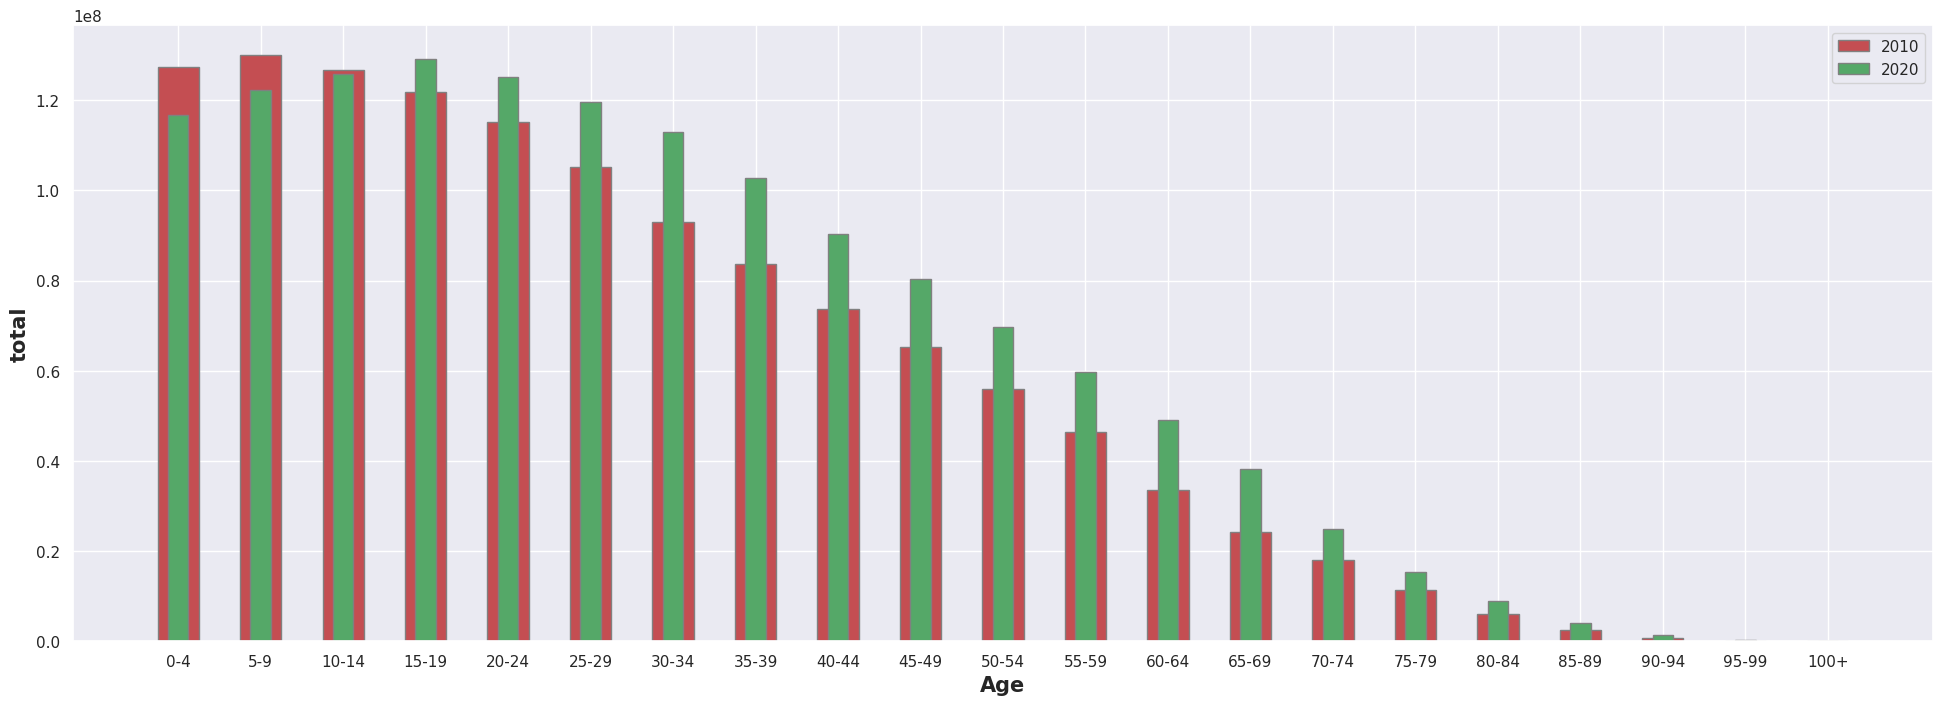

In [329]:
barWidth_1=0.5
barWidth_2=0.25
fig = plt.subplots(figsize =(24, 8))
plt.bar(population_2010['Age'], population_2010['total'], color ='r', width = barWidth_1,
        edgecolor ='grey', label ='2010')
plt.bar(population_2020['Age'],population_2020['total'], color ='g', width = barWidth_2,
        edgecolor ='grey', label ='2020')

# Adding Xticks
plt.xlabel('Age', fontweight ='bold', fontsize = 15)
plt.ylabel('total', fontweight ='bold', fontsize = 15)




plt.legend()
plt.show()

As we can see there has been a significantly growing younger population over the last decade.Signifying a huge student population at school level right from 2010.

Text(0.5, 1.0, 'DEMOGRAPHY OF INDIA')

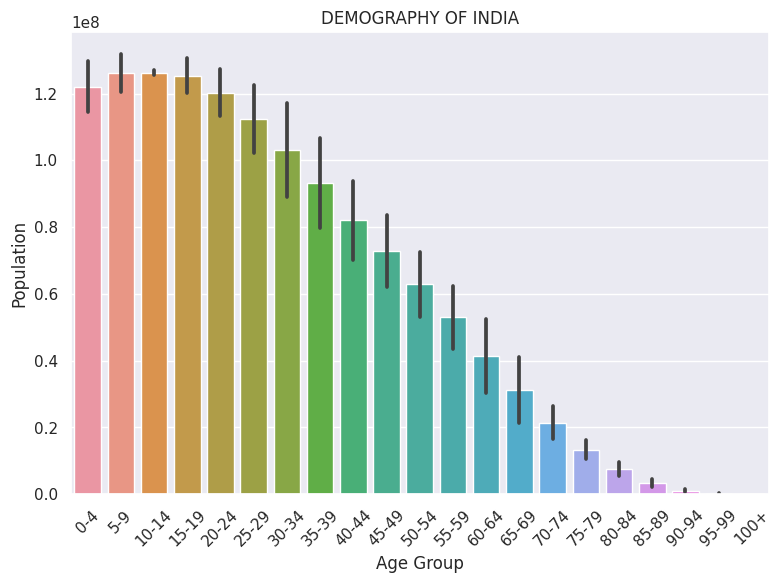

In [330]:
growth=pd.concat([population_2010,population_2020],ignore_index=True)


plt.figure(figsize=(9,6))
sb.barplot(x=growth['Age'], y=growth['total'], errorbar="sd")
plt.xticks(rotation= 45)
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('DEMOGRAPHY OF INDIA')

On the combined population chart Standard Deviation is least in age group of 10-14. Suggesting that there is a demography of that age group has'nt changed much.
This age group is the driving fuel for Edtech Companies as well as the future of indian economy that is going to play a pivotal role in shaping the future of
this country in this century.  

In [331]:
TARGET_AUDIENCE=population_2020.head(7)
TARGET_AUDIENCE['total'].sum()

851443986

In [332]:
data_tarrif=data_cost[2:7]



The prospect of a growing younger population created a potential avenue of Ed Tech Companies to start their ventures back in 2008.With major institutions prefering to stay orthodox.Very few startups saw this oppurtunity and had the headstart with various concepts of smart class rooms and visual learning.Even though limited by their scaling capabilities many companies managed to create waves among students and parents with schools using them for their own marketing partnering with them.  

## EARLY STAGE (2011-2015)

In [333]:
#ED TECH DEALS 2011-2015
deals_till_2015
deals_till_2015.rename(columns = {'Country':'Year'}, inplace = True)
dt=deals_till_2015.transpose()
dt.columns = dt.iloc[0]
dt.rename(columns = {'Country':'Year'}, inplace = True)
dt = dt[1:]
dt

Year,China,India,Uk
2011,6,13,11
2012,10,20,12
2013,28,16,12
2014,33,29,19
2015,54,35,29


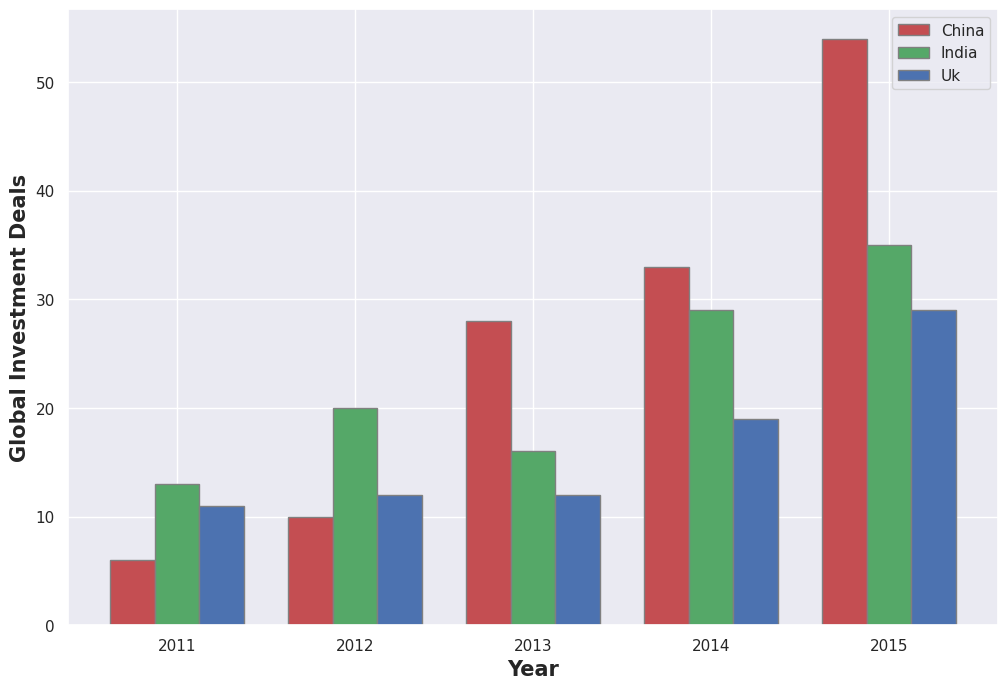

In [334]:
#ED TECH DEALS 2011-2015
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
X=dt['China']
Y=dt['India']
Z=dt['Uk']
# Set position of bar on X axis
br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1,X, color ='r', width = barWidth,
        edgecolor ='grey', label ='China')
plt.bar(br2,Y, color ='g', width = barWidth,
        edgecolor ='grey', label ='India')
plt.bar(br3,Z, color ='b', width = barWidth,
        edgecolor ='grey', label ='Uk')

# Adding Xticks
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Global Investment Deals', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(X))],
        ['2011', '2012', '2013', '2014', '2015'])

plt.legend()
plt.show()

From the above charts which shows the number of global deals signed to invest in  Ed Tech companies.There is a consistent increase in numbers for India suggesting a growing interest for global investors in potential growth of the sector.

In [335]:
marketshare_till_2016.rename(columns = {'Unnamed: 0':'Country'}, inplace = True)

GLOBAL INVESTMENT SHARE UNTIL 2016

<ipython-input-336-0eb52c419443>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



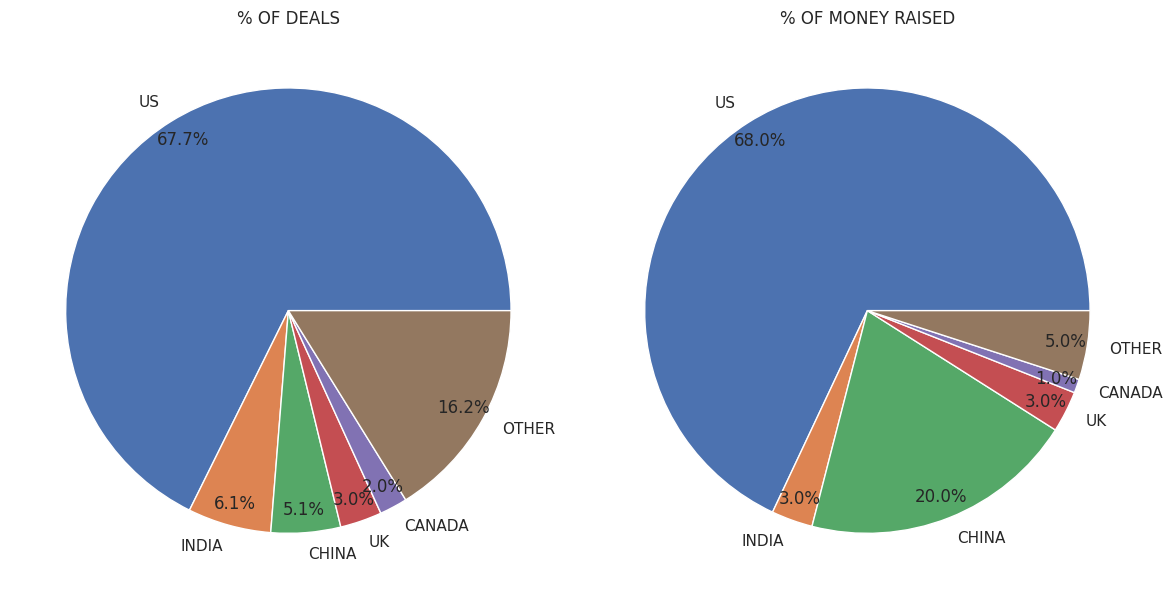

In [336]:
fig = plt.subplots(figsize =(12, 8))

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.pie(marketshare_till_2016['% OF DEALS'],labels=marketshare_till_2016['Country'],autopct="%0.1f%%",pctdistance=0.9)
plt.title('% OF DEALS')

plt.subplot(1, 2, 2)

plt.pie(marketshare_till_2016['%OF SHARE IN MONEY RAISED'],labels=marketshare_till_2016['Country'],autopct="%0.1f%%",pctdistance=0.9)
plt.title('% OF MONEY RAISED')
plt.tight_layout()
plt.show()

We can see the major makert share of investment has gone to the US.But we see the next bigger share in terms of deals and investments have to nations with a Billion people population.And all of thema have significantly large economies.  

## GROWING STAGE

INVESTOR PREFERENCE IN VARIOUS SUB SECTORS OF ED TECH INDUSTRY PRE PANDAMIC

<BarContainer object of 7 artists>

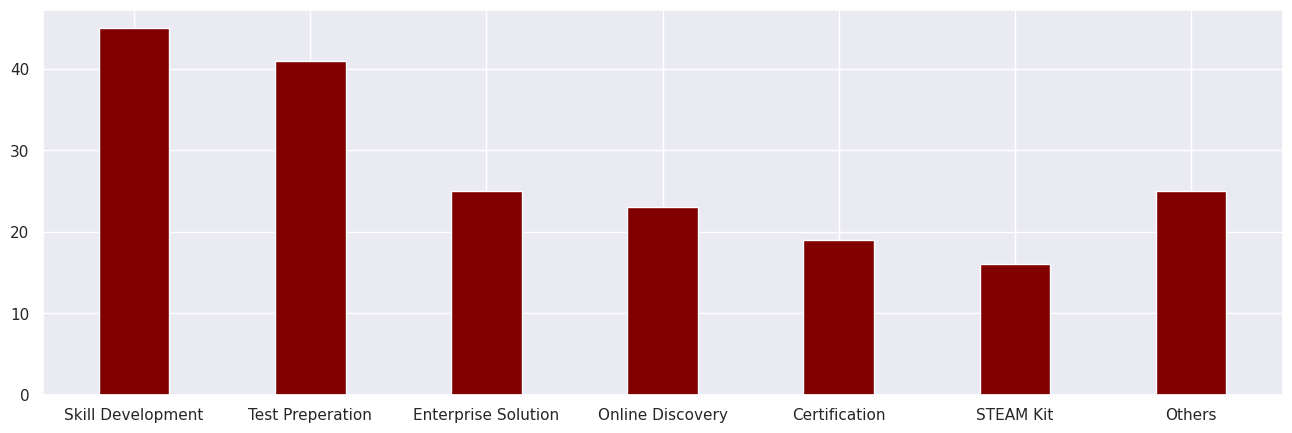

In [337]:
#SUB SECTOR FUNDING(2014-2019)
sub_sector_funding

fig = plt.figure(figsize = (16, 5))

# creating the bar plot
plt.bar(sub_sector_funding['Sub Sectors'],sub_sector_funding['Start Ups Funded(2014-2019)'], color ='maroon',width = 0.4)

Ideal circumstances of a growing Ed Sector made analysts to project a growth and demand for startups focused on skill development of students and young working professionls. This comes at the backdrop of India being the youngest nation in the world with the average median age being 28 by 2022.

<ipython-input-338-dc5a05dc1ac4>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Text(0.5, 1.0, 'investor preferences')

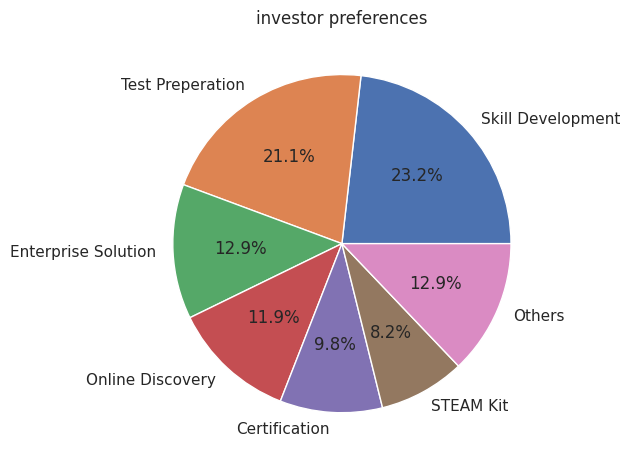

In [338]:
fig = plt.subplots(figsize =(12, 8))

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.pie(sub_sector_funding['Start Ups Funded(2014-2019)'],labels=sub_sector_funding['Sub Sectors'],autopct="%0.1f%%",pctdistance=0.6)
plt.title('investor preferences')

Test Preperation platforms stood as second preference for investors up until then.But this phenomenon was yet to change with the inception of Pandamic.

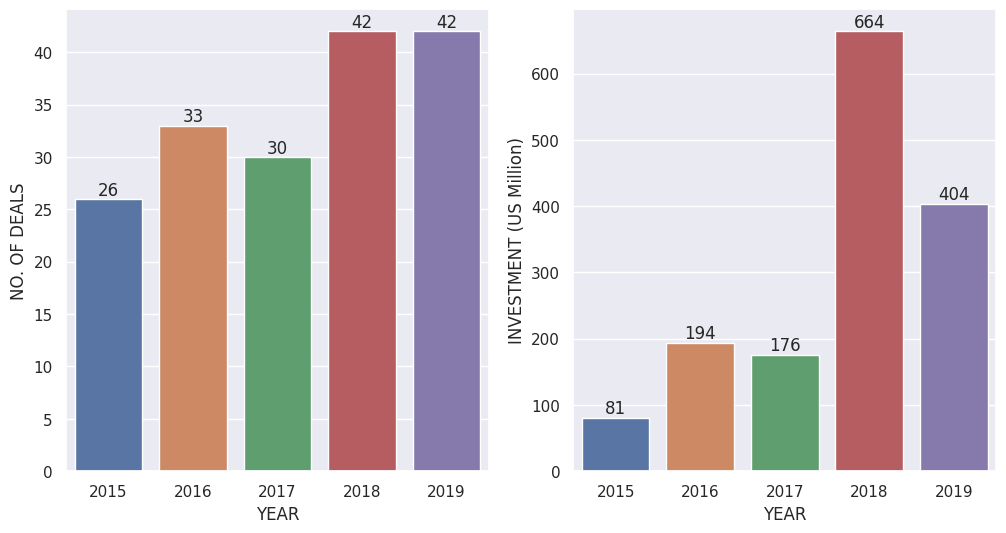

In [339]:
fig = plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
ax = sb.barplot(investments_2015_19, x="YEAR", y="NO. OF DEALS", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12);
plt.subplot(1, 2, 2)
ax = sb.barplot(investments_2015_19, x="YEAR", y="INVESTMENT (US Million)", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12);

As we can see 2018 saw a major increase in the investments. Even though it was part of a growing trend since 2015.

In [340]:
#investments_2015_19 INVESTMENT

## PANDAMIC BOOM

It is common knowledge that the Pandemic had broke the back bone of traditinal modes of learning.Lack of offline mode of learning has created an oppurtunity for Ed Tech companies to fill the gap. This made students turn to online mode just like most of the world. Even though online learning platforms were growing steadyily up until this point,pandemic has opened the doors of these platforms to the world leading to an exponential growth in users. Making EdTech companies one of the few sectors that had seen growth during that period.

In [341]:
k=k_12.dropna()

In [342]:
fig = px.bar(k, x="Grade", y=["2019", "2022", "% growth"],text_auto=True, title="Market Growth of K_12 during Pandamic ")
fig.show()

You can see the growth in the exponentiial rise of market value at different grade levels on e learning platform since pandamic.

In [343]:
kp=post_k12.dropna()

In [344]:
fig = px.bar(kp, x="Category", y=["2019", "2022", "% growth"],text_auto=True, title="Market Growth of Post K_12 during Pandamic")
fig.show()

While test preperation have been the core focus for most e learning platforms. During the Pandemic market growth of Test Preperation and Higher Education had been the most among post K-12 Sector.

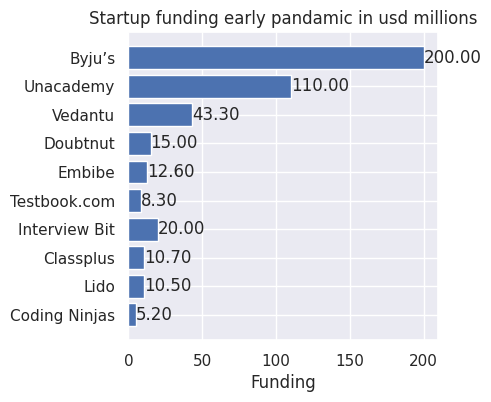

In [345]:
fig, ax = plt.subplots(figsize=(4,4))
y_pos=funding_2020['Startup']
performance=funding_2020['Funding amount (US$ million)']
hbars = ax.barh(y_pos, performance, xerr=None, align='center')
ax.set_yticks(y_pos, labels=y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Funding')
ax.set_title('Startup funding early pandamic in usd millions')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=210)  # adjust xlim to fit labels

plt.show()

Startups that are well established in the market had the advantage in capturing the sudden surge in the users during the pandamic.With the world at stand still and very few avenues that are regestering growth.Ed Tech companies became the new favourite among them for global investors. And well established start ups capitalized their users to attract major share of the funding through Foreign Direct Investments.

In [346]:
ed_tech_deals_2020

,Category,% of Total Deals
0,Test Preparation,25
1,K12,17
2,Skill Development,14
3,Enterprise Solutions,11
4,Online Discovery,11
5,Online Certification,8
6,Others,14


Text(0.5, 1.0, '% SHARE OF DEALS DURING 2020')

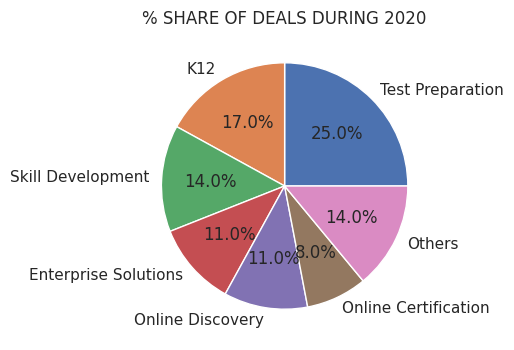

In [347]:
fig = plt.subplots(figsize =(6, 4))

plt.pie(ed_tech_deals_2020['% of Total Deals'],labels=ed_tech_deals_2020['Category'],autopct="%0.1f%%",pctdistance=0.6)
plt.title('% SHARE OF DEALS DURING 2020')

Based on the number of deals above we can where the investors are inclined to invest during the year of pandamic outbreak.

In [348]:
funding_2020

,Startup,Funding amount (US$ million),Investor,EdTech sub-segment
1,Byju’s,200.0,"Tiger Global, General Atlantic, Bond Capital",Test preparation
2,Unacademy,110.0,"Facebook, Sequoia India, Blume Ventures",Test preparation
3,Vedantu,43.3,"GGV Capital, Legend Capital, Omidyar Network",Test preparation
4,Doubtnut,15.0,"Tencent, Omidyar Network, Sequoia India",Test preparation
5,Embibe,12.6,Reliance Industries Limited,Test preparation
6,Testbook.com,8.3,Iron Pillar,Test preparation
7,Interview Bit,20.0,"Sequoia India, Tiger Global, Global Founders C...",Skill development
8,Classplus,10.7,"Blume Ventures, Kunal Shah, Alvin Tse",Enterprise solution
9,Lido,10.5,"BAce Capital, Picus Capital, Madhur Deora",K-12
10,Coding Ninjas,5.2,Info Edge,Online certification


In [349]:
fig = px.pie(funding_2020, values='Funding amount (US$ million)', names='EdTech sub-segment',title='Investor preferences of 2020')
fig.show()
fig1 = px.pie(funding_2020, values='Funding amount (US$ million)', names='Startup',title='company share of total investments in 2020')
fig1.show()

We can see clearly how the test preperation platforms managed to capture the majority of investment seconding the skill development platforms.This was the opposite just a few years ago.

This is mostly due to demography.Majority of the new users among these platforms being in the age group that are preparing for college entrance level exams.

<ipython-input-350-45f523aeae56>:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



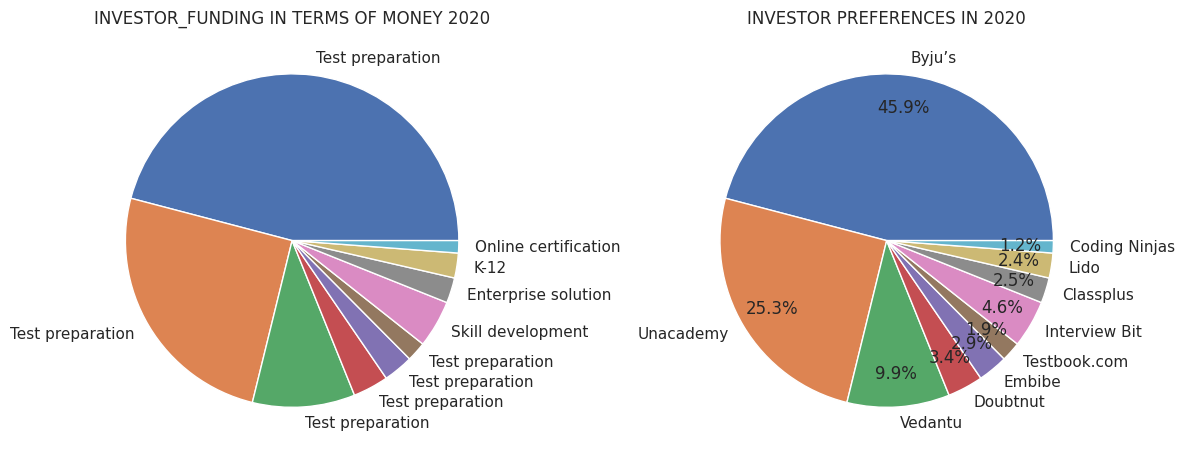

In [350]:
#combined

fig = plt.subplots(figsize =(12,10))

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.pie(funding_2020['Funding amount (US$ million)'],labels=funding_2020['EdTech sub-segment'],pctdistance=0.8)
plt.title('INVESTOR_FUNDING IN TERMS OF MONEY 2020')

plt.subplot(1, 2, 2)  # row 1, column 2, count 2
plt.pie(funding_2020['Funding amount (US$ million)'],labels=funding_2020['Startup'],autopct="%0.1f%%",pctdistance=0.8)
plt.title('INVESTOR PREFERENCES IN 2020')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'post pandamic')

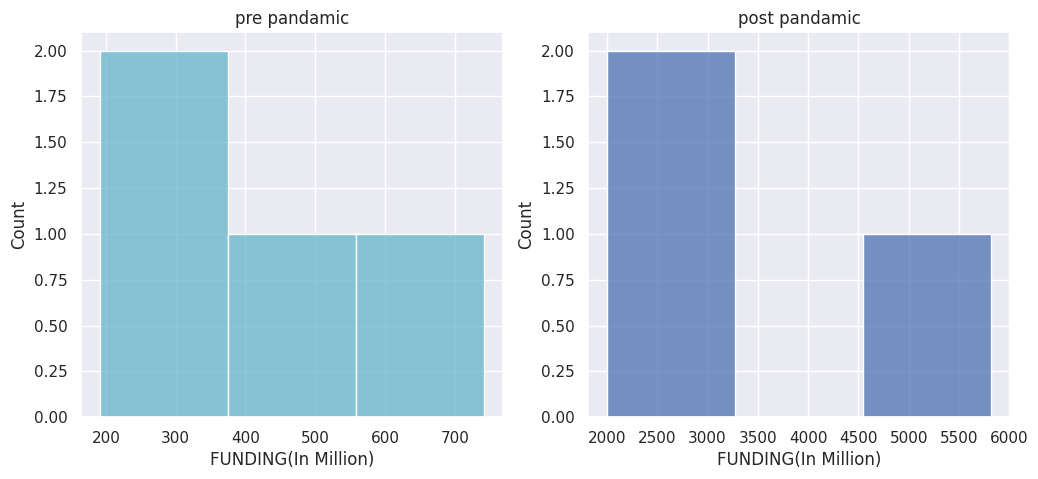

In [351]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sb.histplot(funding_rounds['FUNDING(In Million)'][:4],color='c',ax=ax)
ax.set_title('pre pandamic')

ax=f.add_subplot(122)
sb.histplot(funding_rounds['FUNDING(In Million)'][4:7],color='b',ax=ax)
ax.set_title('post pandamic')

A comparison of the investments the edd tech companies recieved pre and post pandamic can be seen here. And the change in scales shows how remarkable the growth has been.

With almost every Ed Tech Company raising funds attracting investors.Some of them managed to become unicorns.A term given to companies that has a valuation of more than 1 Billion Dollars.This was an unprecedented event to say the least.

PERFORMANCE OF UNICORNS


In [352]:
#hypergrowth
fig = px.bar(hyper_growth, x="Name of the Unicorn", y=["FY20 (IN Cr)", "FY21", "FY22"], title="revenue growth")
fig.show()

With growth in users came the growth in revenue through subscriptions.

In [353]:
fig = px.bar(hyper_growth, x="Name of the Unicorn", y=["Revenue Growth over in FY20  (%)", "Revenue Growth over in FY21 (%)"], title="revenue growth")
fig.show()

Growth in revenue of each unicorn compared to previous year. This shows that the comapnies grew at a pace they could'nt keep up with their previous year growth.

In [354]:
import plotly.express as px

fig = px.bar(high_growth_2020, x='Name of the Unicorn', y='Revenue Growth over in FY20  (%)',
             hover_data=['FY20 (IN Cr)','FY22'], color='FY22',
             labels={'Revenue Growth over in FY20 (%)':'growth'}, height=400)
fig.show()

The revenue generated by each unicorn company over the course of two years with 2020 as the base year shows a clear sign of HYPER GROWTH.

In [355]:
import plotly.express as px

fig = px.bar(hyper_growth, x='Name of the Unicorn', y='Revenue Growth over in FY21 (%)',
             hover_data=['FY20 (IN Cr)','FY21','FY22'], color='FY21',
             labels={'Revenue Growth since FY20 (%)':'growth'}, height=400)
fig.show()

Among all PhysicsWallah seem to be the most profitable in terms of growth rate in revenue.

## POST PANDEMIC

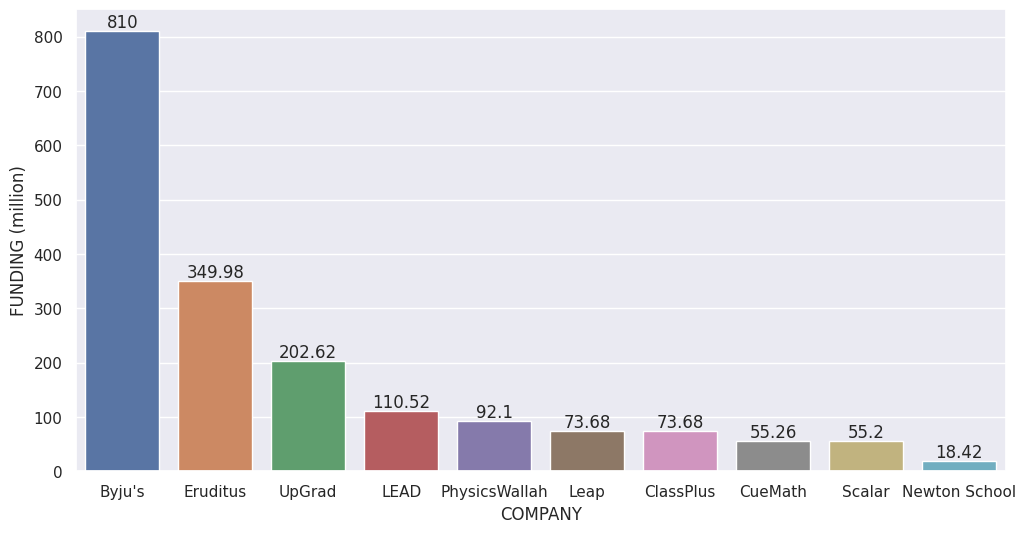

In [356]:
fig = plt.figure(figsize = (12, 6))
ax = sb.barplot(funding_2022, x="COMPANY", y="FUNDING (million)", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12);

Even Post Pandamic many companies raised funds.







Now we shall dive into the various factors that could have helped in the growth of these companies to become what they are now.For a better understanding we shall only take into consideration the data until 2020.The effect of pandamic is an exempted since it is a rare phenomenon.

For an Ed Tech company that deals directly with a student,there are many factors that comes into play.Factors that are beyond the control of both the student and platform.
We will look into the possible factors that potentially played a key role in enabling a student to access the services of an e learning platform.And also the factors that could have been effected because of the growth of e-learning.

#DATA PREPARATION

In [357]:
digital_users=mobile_users[1:6]

tabs_sold=tab_round[6:13]

data_tarrif=data_cost[2:7]

internet_coverage=internet_boom[9:14]
#internet_coverage
internet_coverage.rename(columns = {'YEAR':'Year'}, inplace = True)

#funding
funding=funding_rounds[0:5]
funding.rename(columns = {'YEAR':'Year'}, inplace = True)



<ipython-input-357-099938d0e298>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-357-099938d0e298>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## FACTORS FOR GROWTH


In [358]:
tablet_users

,Year,Tablets sold (million)
0,2010,17.4
1,2011,71.4
2,2012,143.4
3,2013,219.9
4,2014,230.1
5,2015,207.2
6,2016,174.9
7,2017,163.5
8,2018,146.2
9,2019,144.5


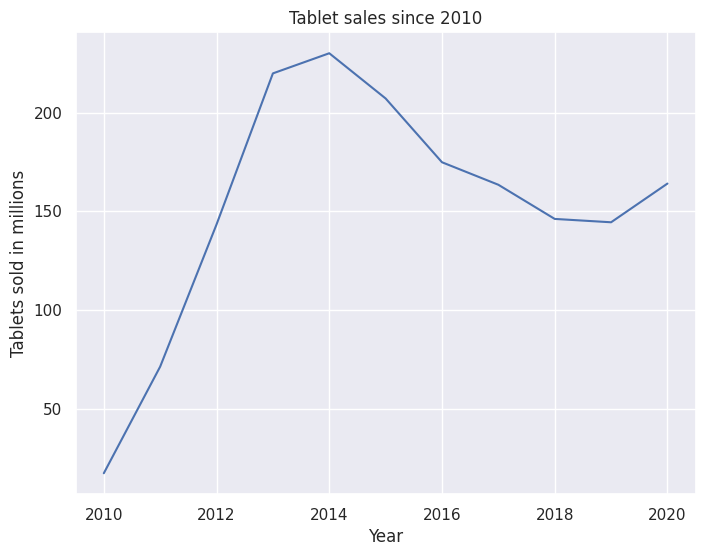

In [359]:
X=tablet_users['Year']
Y=tablet_users['Tablets sold (million)']

plt.plot(X,Y)
plt.title("Tablet sales since 2010")
plt.xlabel("Year")
plt.ylabel("Tablets sold in millions")
plt.show()


As we can see the sale of tablet have been in since 2014.Possibly due to rise of good android mobiles. Tablet sales only saw growth again in 2019.This could possible because of a shift in attitude towards e-learning and an increasing users preference for better experience on bigger screen.

In [360]:
#SECTORWISE GROWTH 2020-2025
#sectorwise_projection

In [361]:
data_cost

,Year,1GB_Data Cost(in Rupee)
0,2014,269.00
1,2015,226.00
2,2016,75.57
3,2017,19.35
4,2018,11.78
5,2019,8.45
6,2020,9.80
7,2021,9.53


In [362]:
internet_boom

,YEAR,INTERNET PENETRATION (%)
0,2007,4.00
1,2008,4.40
2,2009,5.10
3,2010,7.50
4,2011,10.10
5,2012,12.60
6,2013,15.10
7,2014,18.00
8,2015,27.00
9,2016,34.80


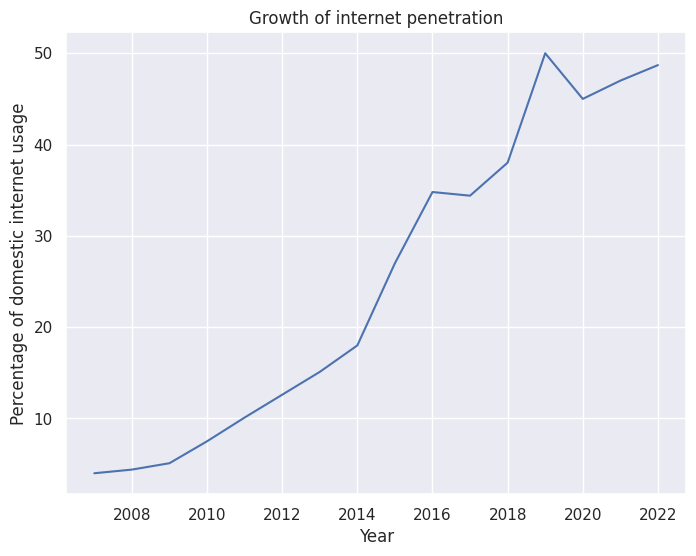

In [363]:
X=internet_boom['YEAR']
Y=internet_boom['INTERNET PENETRATION (%)']

plt.plot(X,Y)
plt.title("Growth of internet penetration")
plt.xlabel("Year")
plt.ylabel("Percentage of domestic internet usage")
plt.show()

With growing infrastructure and rural connectivity,internet connectectivity kept increasing in the last ten years.

In [364]:
mobile_users

,Year,Mobile Phone Internet users,New smart phones(in millions)
0,2015,242.92,134.0
1,2016,281.81,134.0
2,2017,351.60,134.0
3,2018,390.90,147.0
4,2019,420.70,158.0
5,2020,448.20,152.0
6,2021,469.30,168.0
7,2022,486.70,160.0
8,2023,500.90,175.0


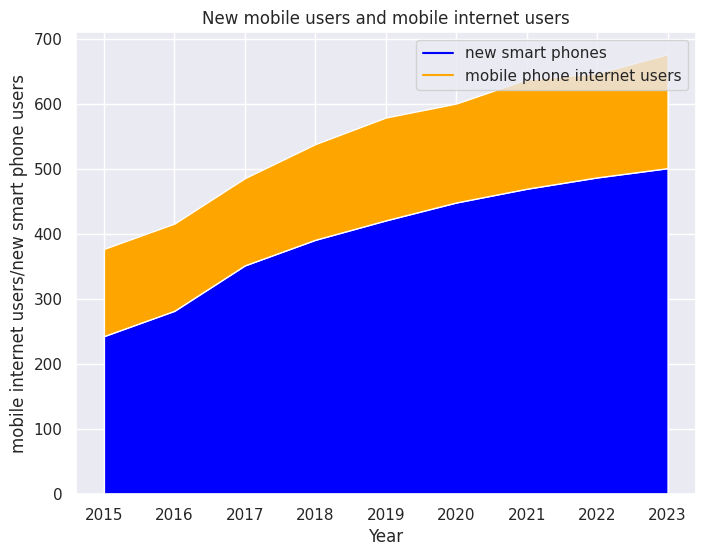

In [365]:
# plot
fig, ax = plt.subplots()
x = mobile_users['Year']
ay = mobile_users['Mobile Phone Internet users']
by = mobile_users['New smart phones(in millions)']

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue',
         label ='new smart phones')
plt.plot([], [], color ='orange',
         label ='mobile phone internet users')

y = ([ay, by])

plt.stackplot(x, ay, by,
              colors =['blue', 'orange'])

plt.title("New mobile users and mobile internet users")
plt.xlabel("Year")
plt.ylabel("mobile internet users/new smart phone users")

plt.legend()

plt.show()

Digital connectivity has led to increase in mobile phone internet users, which inturn fueled the growing sales of new smart phone users every year. This is  clearly visible above as they are seen going in parallels.

In [366]:
#combining the data
steady_growth_1=pd.merge(digital_users,tabs_sold,on='Year', how='left')
internet=pd.merge(data_tarrif,internet_coverage,on='Year', how='left')
steady_growth_2=pd.merge(internet,steady_growth_1,on='Year',how='left')
steady_growth_3=pd.merge(steady_growth_2,funding,on='Year',how='left')

In [367]:
steady_growth_3

,Year,1GB_Data Cost(in Rupee),INTERNET PENETRATION (%),Mobile Phone Internet users,New smart phones(in millions),Tablets sold (million),ROUNDS,FUNDING(In Million)
0,2016,75.57,34.80,281.81,134.0,175.0,145,245
1,2017,19.35,34.40,351.60,134.0,164.0,118,191
2,2018,11.78,38.02,390.90,147.0,146.0,132,742
3,2019,8.45,50.00,420.70,158.0,144.0,146,553
4,2020,9.80,45.00,448.20,152.0,164.0,163,2300


FOREIGN DIRECT INVESTMENT(FDI) IN ED-TECH

Every FDI in the country is monitored by the Reserve Bank  of India.
Government Policy on FDI in education was streamlined in such a way that the companies don't have to seek prior RBI approval and can declare later.
FDI in Indian Edtech comes under Education as per guidlines.

In [368]:
fdi_gov

,SECTOR(Billion USD),2013,2014,2015,2016,2017,2018,2019,2020,2021,2022(US$ billion)
0,Manufacturing,"6,380","9,613","8,439","11,972","7,066",9.6,9.6,9.3,16.3,11.3
1,financial services,"1,026","3,075","3,547","3,732","4,070",7.2,5.7,3.5,4.7,6.8
2,computer services,934,"2,154","4,319","1,937","3,173",3.7,5.1,23.8,9.0,5.6
3,retail and wholesale,"1,000","2,551","3,998","2,771","4,478",4.9,5.1,3.9,5.1,5.3
4,Business services,521,680,"3,031","2,684","3,005",2.8,3.8,1.8,2.5,2.0
5,"Education, Research & Development",150,107,131,394,205,0.9,0.8,1.3,3.6,1.9


In [369]:
#FDI IN ED TECH
FDI_IN_ED=steady_growth_3.iloc[:, [0,1,2,4,6]].copy()
FDI_USD=['394','205','900','800','2600']
FDI_IN_ED['FDI_R&D_ED(USD_MILLIONS)']=FDI_USD
FD=FDI_IN_ED

In [370]:
FD

,Year,1GB_Data Cost(in Rupee),INTERNET PENETRATION (%),New smart phones(in millions),ROUNDS,FDI_R&D_ED(USD_MILLIONS)
0,2016,75.57,34.80,134.0,145,394
1,2017,19.35,34.40,134.0,118,205
2,2018,11.78,38.02,147.0,132,900
3,2019,8.45,50.00,158.0,146,800
4,2020,9.80,45.00,152.0,163,2600


In [371]:
#COMPARING THE DATA FDI DATA AND FUNDING DATA
A=steady_growth_3['FUNDING(In Million)']
B=FD['FDI_R&D_ED(USD_MILLIONS)']
AX=[A,B]

In [372]:
share_of_fdi=pd.DataFrame(AX)
share_of_fdi=share_of_fdi.transpose()
share_int=share_of_fdi.astype(float)
share_int

,FUNDING(In Million),FDI_R&D_ED(USD_MILLIONS)
0,245.0,394.0
1,191.0,205.0
2,742.0,900.0
3,553.0,800.0
4,2300.0,2600.0


In [373]:
share_of_fdi['% OF FDI share']=share_int['FUNDING(In Million)']/share_int['FDI_R&D_ED(USD_MILLIONS)']*100
share_of_fdi

,FUNDING(In Million),FDI_R&D_ED(USD_MILLIONS),% OF FDI share
0,245,394,62.182741
1,191,205,93.170732
2,742,900,82.444444
3,553,800,69.125000
4,2300,2600,88.461538


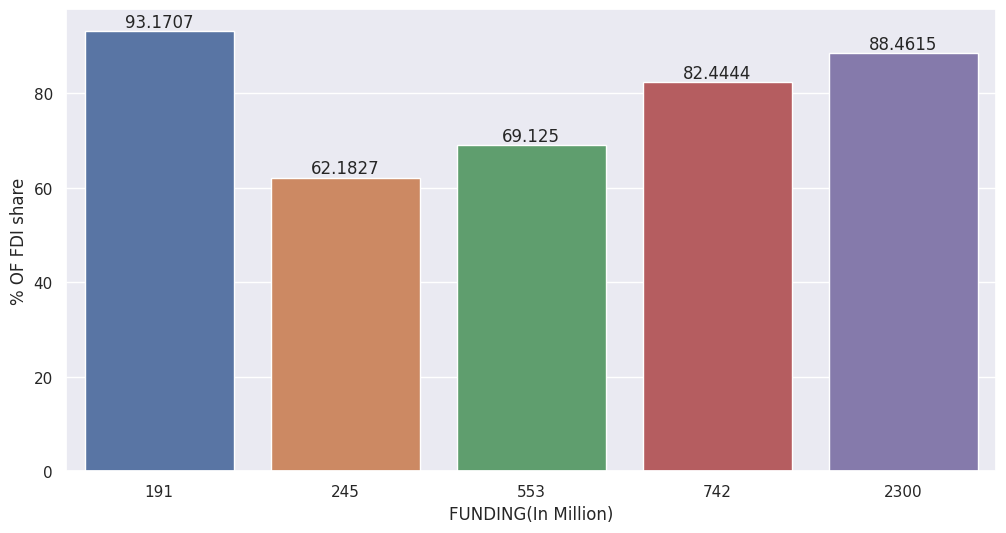

In [374]:
fig = plt.figure(figsize = (12, 6))
ax = sb.barplot(share_of_fdi, x="FUNDING(In Million)", y="% OF FDI share", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12);

This shows that major share of FDI in Education, Research & Development has gone to Ed Tech Companies in recent years.

<ipython-input-375-52a963f98290>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Text(0.5, 1.0, 'Share of FDI')

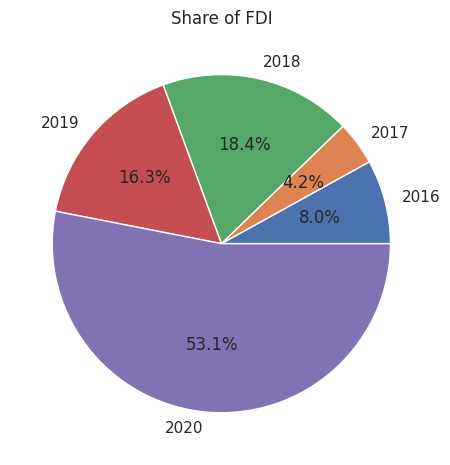

In [375]:
fig = plt.subplots(figsize =(12, 8))

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.pie(share_of_fdi['FDI_R&D_ED(USD_MILLIONS)'],labels=steady_growth_3['Year'],autopct="%0.1f%%",pctdistance=0.6)
plt.title('Share of FDI')

Share of FDI in EdTech every year of the total FDI since 2016.

<ipython-input-376-a79f2a28633f>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



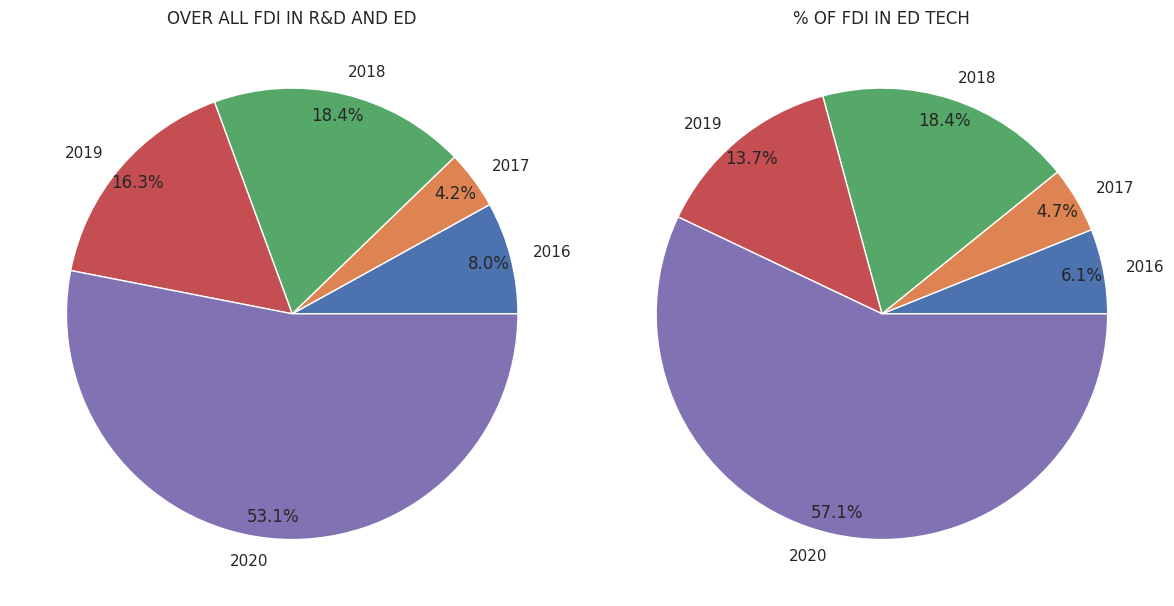

In [376]:
fig = plt.subplots(figsize =(12, 8))

plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.pie(FD['FDI_R&D_ED(USD_MILLIONS)'],labels=FD['Year'],autopct="%0.1f%%",pctdistance=0.9)
plt.title('OVER ALL FDI IN R&D AND ED')

plt.subplot(1, 2, 2)

plt.pie(steady_growth_3['FUNDING(In Million)'],labels=steady_growth_3['Year'],autopct="%0.1f%%",pctdistance=0.9)
plt.title('% OF FDI IN ED TECH')
plt.tight_layout()
plt.show()

In [377]:
fig=px.line(steady_growth_3,x="Year",y=steady_growth_3.columns)
fig.show()

Plotting the entire data

# ANALYSIS

Plotting the correlation map of the combined dataframe to see the relationship between different features of the data.

<ipython-input-378-6d412f205b63>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

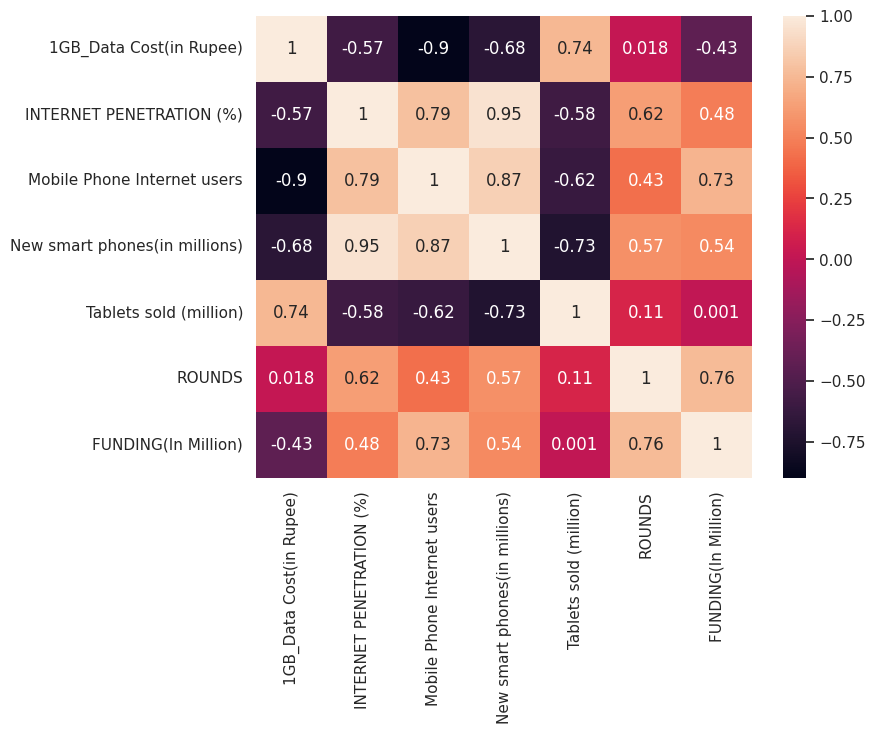

In [378]:
sb.set(rc={'figure.figsize':(8,6)})
sb.heatmap(steady_growth_3.corr(), annot=True)

Common reason why people invest in anything is beacuse of its potential to grow and perform well. From the above correlation map, with respect to the funding through FDI in Ed Tech companies we can deduce the following insights.


1.  Data cost had inverse correlation with funding.Suggesting a deacrease in data cost had enabled access to Ed Tech platforms to many people. Thus,directly contributing to the increase in potential app users.

2.  Internet Penetration,Mobile phone internet users, as well new mobile sales every year have shown a direct positive correlation with funding.Suggesting a growth among them will direct increase the chances of more investments in future.

<ipython-input-379-a8d8329b64ee>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



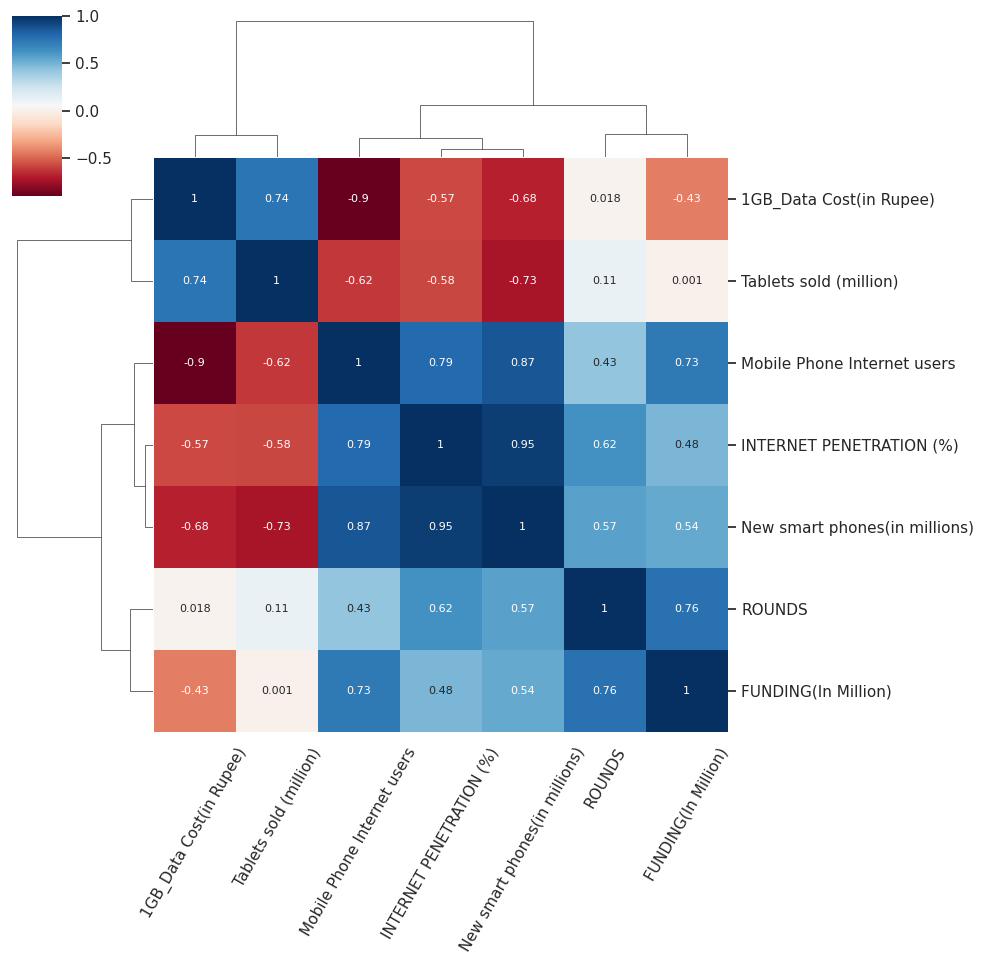

In [379]:
g = sb.clustermap(steady_growth_3.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

APPLYING OLS REGRESSION

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable.

Since most of the Ed tech platforms relay on digital devices such as laptops, mobiles and tablets.We try to draw a relation in terms of thier annual sales and the funding of the companies respectively.

In [380]:
## Independent And Dependent Features
X=steady_growth_3.iloc[:, [4,5]]
y=steady_growth_3.iloc[:,[-2]]

In [381]:
X = sm.add_constant(X)

In [382]:
def fit_ols(x, y):
    model = sm.OLS(y, x)
    results = model.fit()
    return results.summary()

In [383]:
print(fit_ols(X,y))

                            OLS Regression Results                            
Dep. Variable:                 ROUNDS   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     11.03
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0831
Time:                        14:41:54   Log-Likelihood:                -14.438
No. Observations:                   5   AIC:                             34.88
Df Residuals:                       2   BIC:                             33.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



Since it is impossible to predict the amount of funding a company can acquire, we focus on predicting to the number of rounds a company can perform based on the active new users.
Thus, implying money raised is directly proportional to the number of rounds.Although it is not be the case at all times like we discussed earlier.

Therefore we can come to the conclusion that for every 2 million smartphones sold in india to the people that are in age group of the users of an e-learning platform.Ed tech companies can conduct a round of funding to raise funding.

In other words, every 1.5 - 2.2 million users added to an e-learning platform gives a company the leverage to raise one round of funding.